In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import os

In [2]:
ROOT_DIR = '/g/data/w40/ab2313/awap/'

In [3]:
np.array(os.listdir(ROOT_DIR))

array(['awap_regrid.sh', '.awap_regrid.sh.swp', 'awap_grid.grd'],
      dtype='<U19')

In [4]:
f1 = xr.open_dataset(ROOT_DIR + '1.nc')

FileNotFoundError: [Errno 2] No such file or directory: b'/g/data/w40/ab2313/awap/1.nc'

In [ ]:
f1

In [ ]:
f1.lat.values[:5]

In [ ]:
f1.isel(time = 1).precip.plot()

In [ ]:
directory  = '/g/data/w40/ab2313/'
path = directory + 'precip_calib_0.25_1911_2017_land.nc'
awap_old = xr.open_dataset(path, chunks = {'lat':100, 'lon':100, 'time':-1})

In [ ]:
f1.lat.values[::10]

In [ ]:
awap_old.lat.values

# Using ClimTas

In [5]:
import climtas

In [6]:
AWAP_DIR = '/g/data/w40/ab2313'

awap_n2 = xr.open_dataset(f'{AWAP_DIR}/awap_n2.nc')

In [8]:
awap_n2

<xarray.Dataset>
Dimensions:  (lat: 53, lon: 178, time: 7822)
Coordinates:
  * time     (time) datetime64[ns] 1974-10-01 1974-10-02 ... 2017-12-31
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -10.5 -10.25 -10.0
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    info:     North of Australia; wet-season only; raindays only; time delta -9h

In [31]:
UNREGRID_DIR = '/g/data/zv2/agcd/v1/precip/calib/r005/01day'
os.listdir(UNREGRID_DIR)[:5]

['agcd_v1_precip_calib_r005_daily_2003.nc',
 'agcd_v1_precip_calib_r005_daily_1948.nc',
 'agcd_v1_precip_calib_r005_daily_1940.nc',
 'agcd_v1_precip_calib_r005_daily_1911.nc',
 'agcd_v1_precip_calib_r005_daily_1921.nc']

In [10]:
test_file = xr.open_dataset(f'{UNREGRID_DIR}/agcd_v1_precip_calib_r005_daily_2003.nc')

In [11]:
test_file

<xarray.Dataset>
Dimensions:    (lat: 691, lon: 886, nv: 2, time: 365)
Coordinates:
  * time       (time) datetime64[ns] 2003-01-01T09:00:00 ... 2003-12-31T09:00:00
  * lat        (lat) float32 -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
  * lon        (lon) float32 112.0 112.1 112.1 112.2 ... 156.1 156.1 156.2 156.2
Dimensions without coordinates: nv
Data variables:
    lat_bnds   (lat, nv) float32 ...
    lon_bnds   (lon, nv) float32 ...
    time_bnds  (time, nv) datetime64[ns] ...
    precip     (time, lat, lon) float32 ...
    crs        int32 ...
Attributes:
    geospatial_lat_min:        -44.525
    geospatial_lat_max:        -9.975
    geospatial_lon_min:        111.975
    geospatial_lon_max:        156.275
    time_coverage_start:       2002-12-31T09:00:00
    date_created:              2017-03-09T16:47:59.628877
    uuid:                      f21c7044-030a-4bc6-a435-4938706279df
    keywords_reference:        Global Change Master Directory (GCMD). 2015. G...
    acknowledgment:            The Australian Government, Bureau of Meteorolo...
    title:                     Interpolated Calibrated Rain Gauge Precipitation
    keywords_vocabulary:       GCMD Science Keywords, Version 8.1
    standard_name_vocabulary:  CF Standard Names, v28
    keywords:                  Earth Science, Atmosphere, Precipitation, Prec...
    data_format:               netCDF4 with zlib compression
    cdm_data_type:             Grid
    analysis_components:       calib: the gridded daily precipitation data sc...
    url:                       http://www.bom.gov.au/climate/
    id:                        Australian Gridded Climate Data (AGCD)
    summary:                   The calibrated daily rainfall gauge data is sc...
    institution:               Australian Bureau of Meteorology, GPO Box 1289...
    naming_authority:          au.gov.bom
    nco_openmp_thread_number:  1
    time_coverage_end:         2003-12-31T00:00:00
    Conventions:               CF-1.6, ACDD-1.3
    source:                    Data is from site-based observation data recor...
    references:                http://www.bom.gov.au/jshess/docs/2009/jones_h...
    agcd_version:              AGCD (AWAP) v1.0.0 Snapshot (1900-01-01 to 202...
    licence:                   Data Licence: The grid data files in this AGCD...
    description:               This AGCD data is a snapshot of the operationa...
    date_issued:               2020-12-02 05:42:26
    attribution:               Data should be cited as : Australian Bureau of...
    copyright:                 (C) Copyright Commonwealth of Australia 2020, ...
    history:

In [12]:
test_file = test_file.isel(nv = 0).squeeze()
# test_file2 = test_file2.transpose('time','lon', 'lat')
# test_file2.coords

In [13]:
test_file = test_file.precip

In [14]:
test_file

<xarray.DataArray 'precip' (time: 365, lat: 691, lon: 886)>
[223462490 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2003-01-01T09:00:00 ... 2003-12-31T09:00:00
  * lat      (lat) float32 -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
  * lon      (lon) float32 112.0 112.1 112.1 112.2 ... 156.1 156.1 156.2 156.2
Attributes:
    cell_methods:                  time: sum
    units:                         mm
    analysis_version_number:       3.01
    long_name:                     Daily precipitation
    number_of_stations_reporting:  6786
    standard_name:                 lwe_thickness_of_precipitation_amount
    frequency:                     daily
    length_scale_for_analysis:     80.0
    grid_mapping:                  crs
    coverage_content_type:         physicalMeasurement
    valid_range:                   [     0. 100000.]

In [15]:
awap_n2

<xarray.Dataset>
Dimensions:  (lat: 53, lon: 178, time: 7822)
Coordinates:
  * time     (time) datetime64[ns] 1974-10-01 1974-10-02 ... 2017-12-31
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -10.5 -10.25 -10.0
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    info:     North of Australia; wet-season only; raindays only; time delta -9h

In [16]:
climtas.regrid.Regridder(test_file, awap_n2)

In [17]:
regrid_test = climtas.regrid.Regridder(test_file, awap_n2.precip).regrid(test_file)

In [18]:
regrid_test

<xarray.DataArray 'precip' (time: 365, lat: 53, lon: 178)>
dask.array<reshape, shape=(365, 53, 178), dtype=float64, chunksize=(365, 53, 178), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2003-01-01T09:00:00 ... 2003-12-31T09:00:00
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.7 156.0 156.2

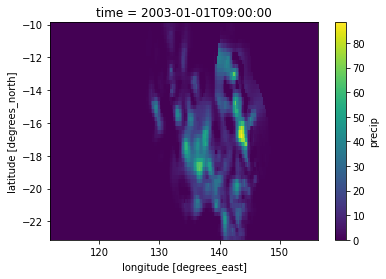

In [19]:
regrid_test.isel(time = 0).plot()

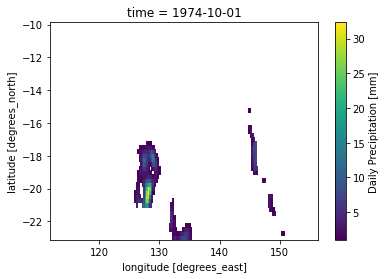

In [20]:
awap_n2.precip.isel(time = 0).plot()

In [21]:
awap_n2.lat.values

array([-23.  , -22.75, -22.5 , -22.25, -22.  , -21.75, -21.5 , -21.25,
       -21.  , -20.75, -20.5 , -20.25, -20.  , -19.75, -19.5 , -19.25,
       -19.  , -18.75, -18.5 , -18.25, -18.  , -17.75, -17.5 , -17.25,
       -17.  , -16.75, -16.5 , -16.25, -16.  , -15.75, -15.5 , -15.25,
       -15.  , -14.75, -14.5 , -14.25, -14.  , -13.75, -13.5 , -13.25,
       -13.  , -12.75, -12.5 , -12.25, -12.  , -11.75, -11.5 , -11.25,
       -11.  , -10.75, -10.5 , -10.25, -10.  ])

In [22]:
regrid_test.lat.values

array([-23.  , -22.75, -22.5 , -22.25, -22.  , -21.75, -21.5 , -21.25,
       -21.  , -20.75, -20.5 , -20.25, -20.  , -19.75, -19.5 , -19.25,
       -19.  , -18.75, -18.5 , -18.25, -18.  , -17.75, -17.5 , -17.25,
       -17.  , -16.75, -16.5 , -16.25, -16.  , -15.75, -15.5 , -15.25,
       -15.  , -14.75, -14.5 , -14.25, -14.  , -13.75, -13.5 , -13.25,
       -13.  , -12.75, -12.5 , -12.25, -12.  , -11.75, -11.5 , -11.25,
       -11.  , -10.75, -10.5 , -10.25, -10.  ])

In [30]:
awap_n2.lon.values[:5]

array([112.  , 112.25, 112.5 , 112.75, 113.  ])

In [29]:
regrid_test.lon.values[:5]

array([112.  , 112.25, 112.5 , 112.75, 113.  ])

# For Loop Regrid

In [49]:
AWAP_DIR = '/g/data/w40/ab2313'

target_grid = xr.open_dataset(f'{AWAP_DIR}/awap_n2.nc')

In [52]:
LAT1, LAT2 = target_grid.lat.values[0], target_grid.lat.values[-1]
LAT1, LAT2 

(-23.0, -10.0)

In [53]:
LON1, LON2 = target_grid.lon.values[0], target_grid.lon.values[-1]
LON1, LON2 

(112.0, 156.25)

In [28]:
UNREGRID_DIR = '/g/data/zv2/agcd/v1/precip/calib/r005/01day'
os.listdir(UNREGRID_DIR)[:5]

['agcd_v1_precip_calib_r005_daily_2003.nc',
 'agcd_v1_precip_calib_r005_daily_1948.nc',
 'agcd_v1_precip_calib_r005_daily_1940.nc',
 'agcd_v1_precip_calib_r005_daily_1911.nc',
 'agcd_v1_precip_calib_r005_daily_1921.nc']

In [57]:
test_file = xr.open_dataset(f'{UNREGRID_DIR}/agcd_v1_precip_calib_r005_daily_2003.nc').precip.to_dataset()
test_file

<xarray.Dataset>
Dimensions:  (lat: 691, lon: 886, time: 365)
Coordinates:
  * time     (time) datetime64[ns] 2003-01-01T09:00:00 ... 2003-12-31T09:00:00
  * lat      (lat) float32 -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
  * lon      (lon) float32 112.0 112.1 112.1 112.2 ... 156.1 156.1 156.2 156.2
Data variables:
    precip   (time, lat, lon) float32 ...

In [60]:
test_file = test_file.sel(lat = slice(LAT1, LAT2), lon = slice(LON1, LON2))
test_file = test_file.where(test_file.time.dt.month.isin([10,12,12,1,2,3]), drop = True)

In [61]:
test_file

<xarray.Dataset>
Dimensions:  (lat: 261, lon: 886, time: 152)
Coordinates:
  * time     (time) datetime64[ns] 2003-01-01T09:00:00 ... 2003-12-31T09:00:00
  * lat      (lat) float32 -23.0 -22.95 -22.9 -22.85 ... -10.1 -10.05 -10.0
  * lon      (lon) float32 112.0 112.1 112.1 112.2 ... 156.1 156.1 156.2 156.2
Data variables:
    precip   (time, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

In [40]:
SAVE_DIR = '/g/data/w40/ab2313/awap'

In [43]:
os.listdir(SAVE_DIR)

['awap_regrid.sh', '.awap_regrid.sh.swp', 'awap_grid.grd']

In [65]:
weights = climtas.regrid.cdo_generate_weights(test_file.precip, target_grid, method='con')
weights

<xarray.Dataset>
Dimensions:              (dst_grid_rank: 2, dst_grid_size: 9434, num_links: 231246, num_wgts: 1, src_grid_rank: 2, src_grid_size: 231246)
Dimensions without coordinates: dst_grid_rank, dst_grid_size, num_links, num_wgts, src_grid_rank, src_grid_size
Data variables:
    src_grid_dims        (src_grid_rank) int32 ...
    dst_grid_dims        (dst_grid_rank) int32 ...
    src_grid_center_lat  (src_grid_size) float64 ...
    dst_grid_center_lat  (dst_grid_size) float64 ...
    src_grid_center_lon  (src_grid_size) float64 ...
    dst_grid_center_lon  (dst_grid_size) float64 ...
    src_grid_imask       (src_grid_size) int32 ...
    dst_grid_imask       (dst_grid_size) int32 ...
    src_grid_area        (src_grid_size) float64 ...
    dst_grid_area        (dst_grid_size) float64 ...
    src_grid_frac        (src_grid_size) float64 ...
    dst_grid_frac        (dst_grid_size) float64 ...
    src_address          (num_links) int32 ...
    dst_address          (num_links) int32 ...
    remap_matrix         (num_links, num_wgts) float64 ...
Attributes:
    title:          SCRIP remapping with CDO
    normalization:  fracarea
    map_method:     Conservative remapping using clipping on sphere
    conventions:    SCRIP
    source_grid:    lonlat
    dest_grid:      lonlat
    history:        11 Jun 2021 : cdo gencon,/local/w40/ab2313/tmp/tmpnkbw9w4...
    CDO:            Climate Data Operators version 1.9.8 (https://mpimet.mpg....

In [66]:
testfile_regrid = climtas.regrid.Regridder(weights=weights).regrid(test_file.precip)

In [67]:
testfile_regrid

<xarray.DataArray 'precip' (time: 152, lat: 53, lon: 178)>
dask.array<reshape, shape=(152, 53, 178), dtype=float64, chunksize=(152, 53, 178), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2003-01-01T09:00:00 ... 2003-12-31T09:00:00
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.7 156.0 156.2

# For Loop

In [69]:
agcd_files = os.listdir(UNREGRID_DIR)
agcd_files[:5]

['agcd_v1_precip_calib_r005_daily_2003.nc',
 'agcd_v1_precip_calib_r005_daily_1948.nc',
 'agcd_v1_precip_calib_r005_daily_1940.nc',
 'agcd_v1_precip_calib_r005_daily_1911.nc',
 'agcd_v1_precip_calib_r005_daily_1921.nc']

In [77]:
agcd_files[5].split('_')[-1].split('.')[0]

'1909'

In [78]:
required_years = np.arange(1970, 2022)
required_years

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [82]:
print(f'All files saved in directory: {SAVE_DIR}')

for year in required_years:
    print(f'{year}')
    print('Attempting to open...')
    agcd_single_year = xr.open_dataset(f'{UNREGRID_DIR}/agcd_v1_precip_calib_r005_daily_{year}.nc')
    agcd_single_year = agcd_single_year.sel(lat = slice(LAT1, LAT2), lon = slice(LON1, LON2))
    agcd_single_year = agcd_single_year.where(agcd_single_year.time.dt.month.isin([10,12,12,1,2,3]), drop = True)
    print('File has been openeded and stripped of unneeded data.')
    
    agcd_single_year_regrid = climtas.regrid.Regridder(weights=weights).regrid(agcd_single_year.precip)
    print('File has been regridded')
    
    agcd_single_year_regrid.to_netcdf(f'{SAVE_DIR}/agcd_regrid_{year}.nc')
    print(f'File ha been saved as agcd_regrid_{year}.nc')
    print('\n----------')

All files saved in directory: /g/data/w40/ab2313/awap
1970
Attempting to open...
File has been openeded and stripped of unnedded data.
File has been regridded
File ha been saved as agcd_regrid_1970.nc

----------
1971
Attempting to open...
File has been openeded and stripped of unnedded data.
File has been regridded
File ha been saved as agcd_regrid_1971.nc

----------
1972
Attempting to open...
File has been openeded and stripped of unnedded data.
File has been regridded
File ha been saved as agcd_regrid_1972.nc

----------
1973
Attempting to open...
File has been openeded and stripped of unnedded data.
File has been regridded
File ha been saved as agcd_regrid_1973.nc

----------
1974
Attempting to open...
File has been openeded and stripped of unnedded data.
File has been regridded
File ha been saved as agcd_regrid_1974.nc

----------
1975
Attempting to open...
File has been openeded and stripped of unnedded data.
File has been regridded
File ha been saved as agcd_regrid_1975.nc

---

FileNotFoundError: [Errno 2] No such file or directory: b'/g/data/zv2/agcd/v1/precip/calib/r005/01day/agcd_v1_precip_calib_r005_daily_2021.nc'

# Merging Files

In [83]:
agcd_regrid_all = xr.open_mfdataset(f'{SAVE_DIR}/*.nc')

In [84]:
agcd_regrid_all

<xarray.Dataset>
Dimensions:  (lat: 53, lon: 178, time: 7703)
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T09:00:00 ... 2020-03-31T09:00:00
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.7 156.0 156.2
Data variables:
    precip   (time, lat, lon) float64 dask.array<chunksize=(152, 53, 178), meta=np.ndarray>

In [85]:
np.unique(agcd_regrid_all.time.dt.year.values)

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [88]:
agcd_regrid_all.to_netcdf('/g/data/w40/ab2313/awap_n3.nc')